In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

# Cancer repartition

In [5]:
def plot_cancer(ds_name, data_train_path, data_test_path):
    
    train = pd.read_csv(data_train_path)
    test = pd.read_csv(data_test_path)
    
    ds = pd.concat((train, test), axis='index', ignore_index=True)
    ds = ds.iloc[:,-35:-5]
    
    sums = pd.DataFrame(ds.sum(axis=0))
    sums.sort_index(inplace=True)
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,10))
    
    sns.barplot(x=sums[0], y=sums.index)
    
    plt.xlabel('number of ncRNAs')
    plt.title(f'Number of ncRNAs associated to each cancer type in {ds_name} dataset')
    
    plt.savefig(f'{ds_name}_cancer.png')
    plt.show()

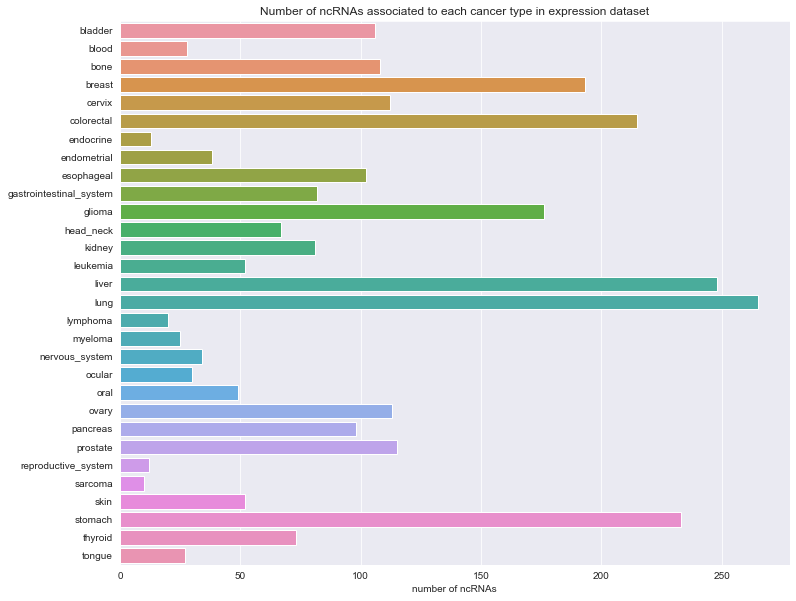

In [6]:
plot_cancer('expression', '../data/expressions_train.csv', '../data/expressions_test.csv')

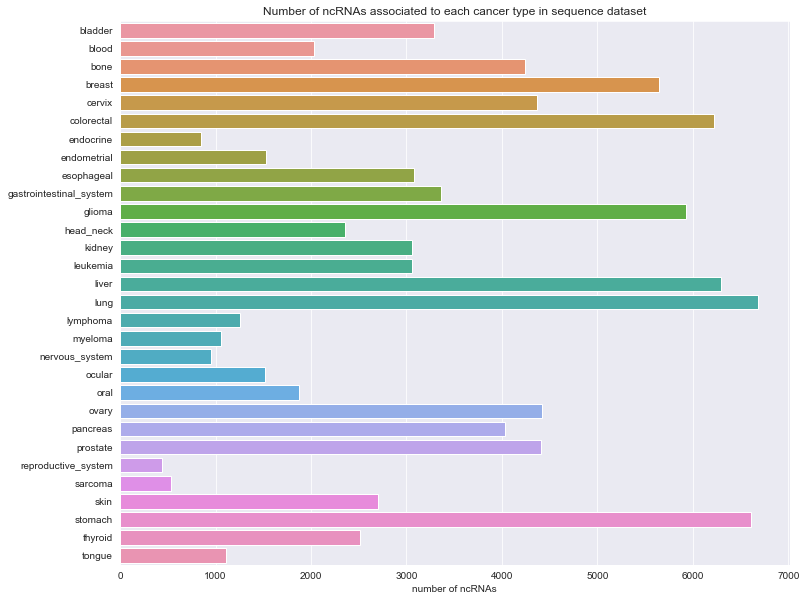

In [18]:
plot_cancer('sequence', '../data/sequences_train.csv', '../data/sequences_test.csv')

# Intersection

In [19]:
def plot_intersection():
    
    plt.figure(figsize=(10,10))

    exp_train = pd.read_csv('../data/expressions_train.csv')
    exp_test = pd.read_csv('../data/expressions_test.csv')
    exp = exp_train.shape[0] + exp_test.shape[0]
    
    seq_train = pd.read_csv('../data/sequences_train.csv')
    seq_test = pd.read_csv('../data/sequences_test.csv')
    seq = seq_train.shape[0] + seq_test.shape[0]
    
    ees_train = pd.read_csv('../data/sequences_expressions_train.csv')
    ees_test = pd.read_csv('../data/sequences_expressions_test.csv')
    ees = ees_train.shape[0] + ees_test.shape[0]
    
    venn2(subsets = (exp, seq, ees), set_labels=('Expressions', 'Sequences'))
    plt.title('Intersection between expression and sequence datasets')
    plt.savefig('intersection.png')
    plt.show()

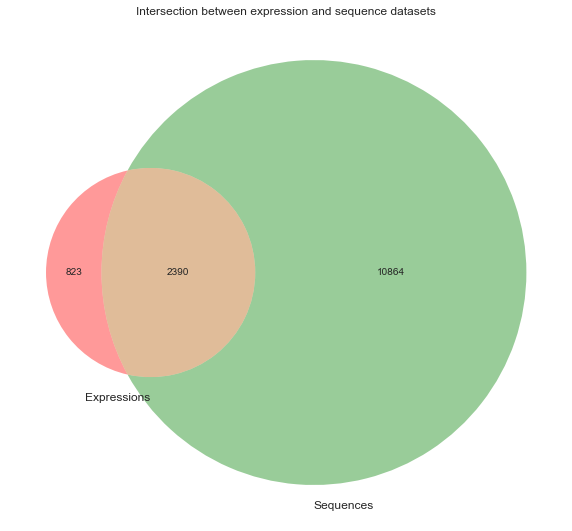

In [20]:
plot_intersection()